<a href="https://colab.research.google.com/github/jaaaamj0711/DACON/blob/main/%ED%95%9C%EA%B5%AD%20%EB%B6%80%EB%8F%99%EC%82%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/Analysis_result2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코스피 산업군 군집분석 결과에 따른 주택매매가격지수와의 상관관계 분석

In [ ]:
# 필요 패키지 설치
!pip install tslearn
!pip install kneed

In [ ]:
from sklearn.preprocessing import StandardScaler

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.utils import to_time_series_dataset

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from kneed import KneeLocator

from datetime import date
import numpy as np
import pandas as pd
import random

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquare = 

In [ ]:
kospi = pd.read_csv("/content/drive/MyDrive/open (2)/코스피_산업별_주가지수.csv", encoding = "CP949")
kospi.head()

,날짜,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,2000-01-01,1186.95,1140.02,355.40,381.45,797.70,964.28,500.98,1477.68,399.13,4250.02,785.91,282.71,287.89,961.33,101.24,726.69,809.01,328.16,160.37,2315.58,3397.18,760.89
1,2000-02-01,1051.13,1064.90,350.45,327.25,716.03,1264.12,411.56,1254.39,378.20,3704.27,870.82,217.45,240.64,811.02,77.23,673.50,753.98,253.12,112.39,1906.11,2812.40,952.39
2,2000-03-01,1196.83,1074.09,375.93,354.76,755.94,1201.82,435.58,1225.27,346.24,4655.30,747.86,226.72,265.52,898.48,74.70,733.95,703.72,213.12,104.76,1397.07,2451.53,810.17
3,2000-04-01,1017.99,911.25,313.76,305.77,624.65,997.37,411.75,998.09,279.67,4009.41,649.91,188.30,221.81,903.47,69.75,550.21,540.78,180.92,101.69,987.68,1947.97,655.84
4,2000-05-01,979.88,771.48,250.99,230.29,527.90,873.13,360.92,977.54,239.36,3971.40,521.46,200.83,187.06,842.20,62.24,433.71,643.54,185.72,103.74,1072.90,2118.68,630.57


In [ ]:
# 날짜를 인덱스로 변경
kospi = kospi.set_index('날짜')
kospi = pd.DataFrame(kospi)
kospi.head()

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
날짜,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1186.95,1140.02,355.40,381.45,797.70,964.28,500.98,1477.68,399.13,4250.02,785.91,282.71,287.89,961.33,101.24,726.69,809.01,328.16,160.37,2315.58,3397.18,760.89
2000-02-01,1051.13,1064.90,350.45,327.25,716.03,1264.12,411.56,1254.39,378.20,3704.27,870.82,217.45,240.64,811.02,77.23,673.50,753.98,253.12,112.39,1906.11,2812.40,952.39
2000-03-01,1196.83,1074.09,375.93,354.76,755.94,1201.82,435.58,1225.27,346.24,4655.30,747.86,226.72,265.52,898.48,74.70,733.95,703.72,213.12,104.76,1397.07,2451.53,810.17
2000-04-01,1017.99,911.25,313.76,305.77,624.65,997.37,411.75,998.09,279.67,4009.41,649.91,188.30,221.81,903.47,69.75,550.21,540.78,180.92,101.69,987.68,1947.97,655.84
2000-05-01,979.88,771.48,250.99,230.29,527.90,873.13,360.92,977.54,239.36,3971.40,521.46,200.83,187.06,842.20,62.24,433.71,643.54,185.72,103.74,1072.90,2118.68,630.57


In [ ]:
column_name = kospi.columns
column_name

Index(['제조업', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업', '금융업',
       '은행', '증권', '보험', '서비스업'],
      dtype='object')

## 산업군별 코스피 지수 시각화

In [ ]:
fig = go.Figure()

for category in column_name:
  fig.add_trace(go.Scatter(y=kospi[category], mode = 'lines', name = category))

fig.show()

### 정규화 진행 후 산업군별 코스피 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

fig = go.Figure()

for category in column_name:
    kospi[category] = scaler.fit_transform(pd.DataFrame(kospi[category]))
    fig.add_trace(go.Scatter(y=kospi[category], mode='lines', name=category))

fig.show()

## 군집분석(euclidean 사용) 

In [ ]:
# 군집분석을 위한 형태로 변형
kospi2 = to_time_series_dataset(kospi.values.T)

### 군집개수 설정을 위한 분석

In [ ]:
value = []

for k in range(1, 8):
    model = TimeSeriesKMeans(n_clusters=k, metric='euclidean', verbose=False, random_state=42)
    model.fit(kospi2)
    value.append(model.inertia_)
    print(f'군집 수 {k}개 일때 Inertia value: {value[-1]}')

군집 수 1개 일때 Inertia value: 120.47140586709601
군집 수 2개 일때 Inertia value: 76.30313876284393
군집 수 3개 일때 Inertia value: 58.36152555998181
군집 수 4개 일때 Inertia value: 48.83906683529538
군집 수 5개 일때 Inertia value: 41.85136599893064
군집 수 6개 일때 Inertia value: 33.718062730702584
군집 수 7개 일때 Inertia value: 26.81074642446698


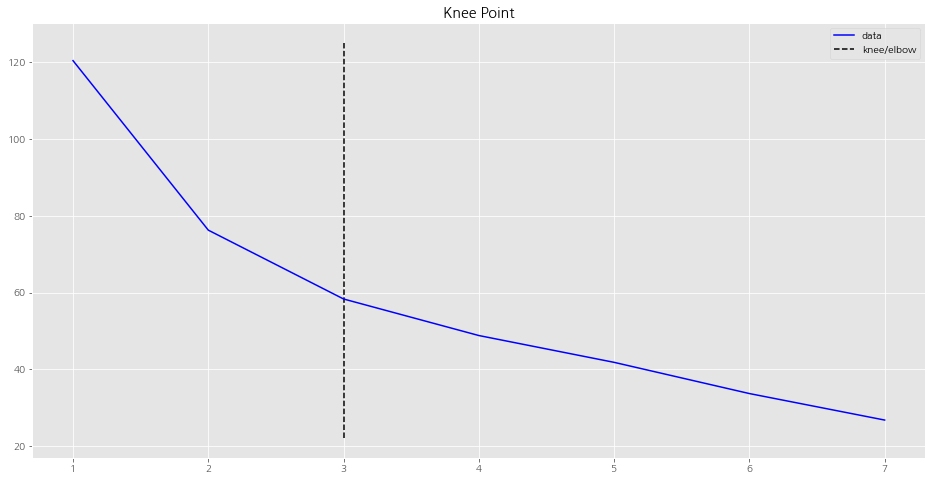

In [ ]:
knee = KneeLocator(range(1, len(value)+1), value, curve='convex', direction='decreasing', online=True)
knee.plot_knee(figsize=(16,8))

- 위 그래프 별과 군집 개수가 3일때부터 완만해짐을 알 수 있습니다. 따라서 군집 개수가 3개가 적당해 보입니다.

### 군집분석 진행(k=3)

In [ ]:
euclidean_k3 = TimeSeriesKMeans(n_clusters=3, metric='euclidean', verbose=True, random_state=42)
euclidean_k3_label = euclidean_k3.fit_predict(kospi2)

101.477 --> 65.978 --> 60.546 --> 58.362 --> 58.362 --> 


In [ ]:
fig = go.Figure()

plot_names = []
buttons = []
states = []

cluster_value = np.unique(euclidean_k3_label)
default_cluster = "군집 1"

for i in range(len(cluster_value)):
    for cluster_i in np.argwhere(euclidean_k3_label == cluster_value[i]): # 각 클러스터에 해당하는 위치 찾기
        fig.add_trace(go.Scatter(x=kospi.iloc[:, cluster_i].index, y=kospi.iloc[:, cluster_i].values.flatten(), 
                                 name=kospi.columns[cluster_i][0], 
                                 line=dict(color="gray"), 
                                 visible=(f'군집 {i+1}'== default_cluster)))
    fig.add_trace(go.Scatter(x=kospi.iloc[:, cluster_i].index, 
                             y=euclidean_k3.cluster_centers_[cluster_value[i]].flatten(), 
                             name=f'군집 {i+1} 중심', 
                             line=dict(color="Orange"), 
                             visible=(f'군집 {i+1}'== default_cluster)))
    plot_names.extend([f'군집 {i+1}']*(len(np.argwhere(euclidean_k3_label == cluster_value[i]))+1))

for j in range(len(cluster_value)):
    states.append(f'군집 {j+1}')
    buttons.append(dict(method='update',
                        label=f'군집 {j+1}',
                        args = [{'visible': [f'군집 {j+1}'==r for r in plot_names]}]))

fig.update_layout(title_text='K-Means_Euclidean_k3', showlegend=True, updatemenus=[{"buttons": buttons, "direction": "down", "active": states.index(default_cluster), "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

### 군집 분석(k=4)

In [ ]:
euclidean_k4 = TimeSeriesKMeans(n_clusters=4, metric='euclidean', verbose=True, random_state=42)
euclidean_k4_label = euclidean_k4.fit_predict(kospi2)

86.684 --> 56.455 --> 51.023 --> 48.839 --> 48.839 --> 


In [ ]:
fig = go.Figure()

plot_names = []
buttons = []
states = []

cluster_value = np.unique(euclidean_k4_label)
default_cluster = "군집 1"

for i in range(len(cluster_value)):
    for cluster_i in np.argwhere(euclidean_k4_label == cluster_value[i]): # 각 클러스터에 해당하는 위치 찾기
        fig.add_trace(go.Scatter(x=kospi.iloc[:, cluster_i].index, y=kospi.iloc[:, cluster_i].values.flatten(), 
                                 name=kospi.columns[cluster_i][0], 
                                 line=dict(color="gray"), 
                                 visible=(f'군집 {i+1}'== default_cluster)))
    fig.add_trace(go.Scatter(x=kospi.iloc[:, cluster_i].index, 
                             y=euclidean_k4.cluster_centers_[cluster_value[i]].flatten(), 
                             name=f'군집 {i+1} 중심', 
                             line=dict(color="Orange"), 
                             visible=(f'군집 {i+1}'== default_cluster)))
    plot_names.extend([f'군집 {i+1}']*(len(np.argwhere(euclidean_k4_label == cluster_value[i]))+1))

for j in range(len(cluster_value)):
    states.append(f'군집 {j+1}')
    buttons.append(dict(method='update',
                        label=f'군집 {j+1}',
                        args = [{'visible': [f'군집 {j+1}'==r for r in plot_names]}]))

fig.update_layout(title_text='K-Means_Euclidean_k4', showlegend=True, updatemenus=[{"buttons": buttons, "direction": "down", "active": states.index(default_cluster), "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

### PCA를 적용하여 군집이 잘 형성되었는지 확인

In [ ]:
nsamle, nx, ny = kospi2.shape
kospi2_pca = kospi2.reshape((nsamle,nx*ny))

#### K=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



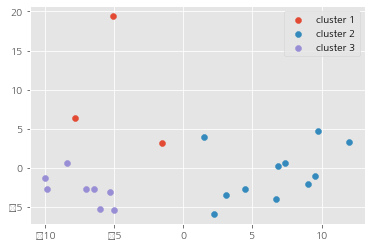

In [ ]:
pca = PCA(n_components=2)  
pca_fit = pca.fit_transform(kospi2_pca)

for i in range(3):
  label_name = "cluster " +str(i+1)
  plt.scatter(pca_fit[[euclidean_k3_label==i]][:,0],pca_fit[[euclidean_k3_label==i]][:,1],label=label_name)

plt.legend()
plt.show()

#### K=4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



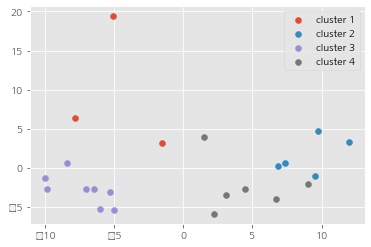

In [ ]:
pca = PCA(n_components=2)  
pca_fit = pca.fit_transform(kospi2_pca)

for i in range(4):
  label_name = "cluster " +str(i+1)
  plt.scatter(pca_fit[[euclidean_k4_label==i]][:,0],pca_fit[[euclidean_k4_label==i]][:,1],label=label_name)

plt.legend()
plt.show()

- K=3, K=4일때를 비교해본 결과 K=3이 군집이 더 잘 형성됨을 보이므로 최종 군집 개수를 3개로 설정하였습니다.

군집분석을 결과 각 군집별 중심값을 도출하였습니다. 이 중심값과 주택매매지수와의 상관분석을 진행하고자 합니다.

## 상관분석 진행을 위한 데이터셋 통합

In [ ]:
# 군집별 중신값 데이터셋
c1 = pd.DataFrame(euclidean_k3.cluster_centers_[0], columns=['군집1_중심'])
c2 = pd.DataFrame(euclidean_k3.cluster_centers_[1], columns=['군집2_중심'])
c3 = pd.DataFrame(euclidean_k3.cluster_centers_[2], columns=['군집3_중심'])
center_result = pd.concat([c1,c2,c3],axis=1)
center_result.index = kospi.index
center_result

,군집1_중심,군집2_중심,군집3_중심
날짜,,,
2000-01-01,3.001572,-0.849940,-0.972535
2000-02-01,2.486401,-1.167639,-0.942972
2000-03-01,2.476201,-1.234568,-0.970734
2000-04-01,1.260472,-1.408181,-1.103688
2000-05-01,1.153880,-1.463478,-1.171049
...,...,...,...
2020-11-01,0.518109,-0.231509,1.932128
2020-12-01,0.415946,-0.094148,2.312603
2021-01-01,0.499006,-0.129882,2.473288


In [ ]:
# 군집별 중심값 데이터셋 저장
center_result.to_csv("/content/drive/MyDrive/open (2)/center_cluster_result.csv")

In [ ]:
# 산업군별 코스피 데이터와 군집별 중심값 데이터 통합  
result_data = pd.concat([center_result,kospi],axis=1)
result_data.head()

,군집1_중심,군집2_중심,군집3_중심,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
날짜,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,3.001572,-0.849940,-0.972535,-1.257398,-1.234981,1.512313,1.015728,-1.307052,-0.983268,-1.192945,-1.377507,-1.057901,-0.872436,-0.713345,-1.434127,-0.845365,-0.075241,-0.515999,-1.146584,6.476675,-0.672596,-1.127249,0.539378,-1.636147,-0.218858
2000-02-01,2.486401,-1.167639,-0.942972,-1.340759,-1.289411,1.454061,0.292311,-1.350913,-0.915108,-1.393847,-1.497909,-1.105160,-0.967522,-0.620683,-1.514615,-1.223488,-0.616328,-0.826617,-1.211101,5.712832,-1.314855,-1.769653,-0.032235,-1.732073,0.334471
2000-03-01,2.476201,-1.234568,-0.970734,-1.251334,-1.282753,1.753913,0.659491,-1.329480,-0.929270,-1.339880,-1.513611,-1.177324,-0.801824,-0.754868,-1.503182,-1.024383,-0.301488,-0.859347,-1.137778,5.015199,-1.657211,-1.871811,-0.742847,-1.791270,-0.076466
2000-04-01,1.260472,-1.408181,-1.103688,-1.361099,-1.400742,1.022288,0.005613,-1.399988,-0.975746,-1.393420,-1.636110,-1.327636,-0.914357,-0.861760,-1.550567,-1.374177,-0.283525,-0.923385,-1.360647,2.753514,-1.932808,-1.912916,-1.314348,-1.873873,-0.522394
2000-05-01,1.153880,-1.463478,-1.171049,-1.384490,-1.502016,0.283601,-1.001832,-1.451948,-1.003988,-1.507621,-1.647191,-1.418654,-0.920980,-1.001937,-1.535113,-1.652267,-0.504086,-1.020542,-1.501957,4.179872,-1.891725,-1.885468,-1.195383,-1.845870,-0.595411


In [ ]:
# result_data 형식 변형
result_data2 = pd.melt(result_data,ignore_index=False)
result_data2

,variable,value
날짜,,
2000-01-01,군집1_중심,3.001572
2000-02-01,군집1_중심,2.486401
2000-03-01,군집1_중심,2.476201
2000-04-01,군집1_중심,1.260472
2000-05-01,군집1_중심,1.153880
...,...,...
2020-11-01,서비스업,2.127198
2020-12-01,서비스업,2.320473
2021-01-01,서비스업,2.647500


In [ ]:
# 데이터 컬럼명 변경
result_data2 = result_data2.rename(columns = {'variable':'산업구분', 'value':'값'})
result_data2.head()

,산업구분,값
날짜,,
2000-01-01,군집1_중심,3.001572
2000-02-01,군집1_중심,2.486401
2000-03-01,군집1_중심,2.476201
2000-04-01,군집1_중심,1.260472
2000-05-01,군집1_중심,1.153880


In [ ]:
cluster_1 = ['섬유의복','종이목재','통신업','군집1_중심']
cluster_2 = ['철강금속','기계','운수장비','유통업','전기가스업','건설업','운수창고업','금융업','은행','증권','보험', '군집2_중심']
cluster_3 = ['제조업','음식료품','화학','의약품','비금속광물','전기전자','의료정밀','서비스업', '군집3_중심']

In [ ]:
# 군집구분 컬럼 추가를 위한 함수
def cluster(type):
    if type in cluster_1: return '군집1'
    elif type in cluster_2: return '군집2'
    else: return '군집3'

result_data2['군집구분'] = result_data2.apply(lambda x: cluster(x['산업구분']),axis=1)

In [ ]:
# 군집1 확인
result_data2[result_data2['군집구분']=='군집1']['산업구분'].value_counts()

섬유의복      255
종이목재      255
군집1_중심    255
통신업       255
Name: 산업구분, dtype: int64

In [ ]:
# 군집2 확인
result_data2[result_data2['군집구분']=='군집2']['산업구분'].value_counts()

보험        255
기계        255
운수장비      255
철강금속      255
운수창고업     255
금융업       255
은행        255
건설업       255
군집2_중심    255
유통업       255
전기가스업     255
증권        255
Name: 산업구분, dtype: int64

In [ ]:
# 군집3 확인
result_data2[result_data2['군집구분']=='군집3']['산업구분'].value_counts()

화학        255
전기전자      255
음식료품      255
서비스업      255
제조업       255
의료정밀      255
비금속광물     255
군집3_중심    255
의약품       255
Name: 산업구분, dtype: int64

In [ ]:
# 데이터셋 저장
result_data2.to_csv("./cluster_result.csv")

## 상관분석


In [ ]:
# 주택매매데이터 불러오기
trading = pd.read_csv("/content/drive/MyDrive/open (2)/주택매매가격지수(KB).csv")
trading.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


In [ ]:
# 주택매매가격지수(trading) 데이터 전처리 1) 날짜 set_index
trading = trading.rename(columns={"Unnamed: 0":"날짜"})
trading = trading.set_index('날짜')
trading = pd.DataFrame(trading)
trading.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
날짜,,,,,,
1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


In [ ]:
# 주택매매가격지수(trading) 데이터 전처리 2) 날짜 2000년부터 
trading = trading.loc["2000-01-01": "2021-03-01"]
trading

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
날짜,,,,,,
2000-01-01,48.819,72.153,56.103,39.474,31.660,39.451
2000-02-01,49.027,72.236,56.231,39.783,32.136,39.782
2000-03-01,49.234,72.319,56.615,40.015,32.433,40.114
2000-04-01,49.286,72.236,56.679,40.092,32.433,40.238
2000-05-01,49.234,72.153,56.615,40.015,32.403,40.238
...,...,...,...,...,...,...
2020-11-01,107.125,104.334,106.398,107.506,114.853,112.139
2020-12-01,108.586,104.909,107.237,109.346,116.365,113.532
2021-01-01,109.878,105.303,107.895,111.005,118.230,114.974


In [ ]:
# cluster 결과 데이터와 주택매매가격지수 데이터 통합
cluster_trading = pd.concat([trading, result_data], axis=1)
cluster_trading.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,48.819,72.153,56.103,39.474,31.660,39.451,3.001572,-0.849940,-0.972535,-1.257398,-1.234981,1.512313,1.015728,-1.307052,-0.983268,-1.192945,-1.377507,-1.057901,-0.872436,-0.713345,-1.434127,-0.845365,-0.075241,-0.515999,-1.146584,6.476675,-0.672596,-1.127249,0.539378,-1.636147,-0.218858
2000-02-01,49.027,72.236,56.231,39.783,32.136,39.782,2.486401,-1.167639,-0.942972,-1.340759,-1.289411,1.454061,0.292311,-1.350913,-0.915108,-1.393847,-1.497909,-1.105160,-0.967522,-0.620683,-1.514615,-1.223488,-0.616328,-0.826617,-1.211101,5.712832,-1.314855,-1.769653,-0.032235,-1.732073,0.334471
2000-03-01,49.234,72.319,56.615,40.015,32.433,40.114,2.476201,-1.234568,-0.970734,-1.251334,-1.282753,1.753913,0.659491,-1.329480,-0.929270,-1.339880,-1.513611,-1.177324,-0.801824,-0.754868,-1.503182,-1.024383,-0.301488,-0.859347,-1.137778,5.015199,-1.657211,-1.871811,-0.742847,-1.791270,-0.076466
2000-04-01,49.286,72.236,56.679,40.092,32.433,40.238,1.260472,-1.408181,-1.103688,-1.361099,-1.400742,1.022288,0.005613,-1.399988,-0.975746,-1.393420,-1.636110,-1.327636,-0.914357,-0.861760,-1.550567,-1.374177,-0.283525,-0.923385,-1.360647,2.753514,-1.932808,-1.912916,-1.314348,-1.873873,-0.522394
2000-05-01,49.234,72.153,56.615,40.015,32.403,40.238,1.153880,-1.463478,-1.171049,-1.384490,-1.502016,0.283601,-1.001832,-1.451948,-1.003988,-1.507621,-1.647191,-1.418654,-0.920980,-1.001937,-1.535113,-1.652267,-0.504086,-1.020542,-1.501957,4.179872,-1.891725,-1.885468,-1.195383,-1.845870,-0.595411


### 코스피 산업군 전체 종목과 주태매매가격지수와의 상관분석

In [ ]:
# 전체에 대한 상관분석
cluster_trading_cor = cluster_trading.corr()
cluster_trading_cor = cluster_trading_cor.apply(lambda x: round(x, 2))
cluster_trading_cor

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
총지수[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.30,0.58,0.94,0.95,0.88,0.44,0.63,0.93,0.83,0.75,0.63,0.45,0.86,0.89,0.72,0.68,0.45,0.18,0.49,-0.37,0.52,0.42,0.22,0.77,0.89
단독주택[2019.01=100],0.98,1.00,0.97,0.98,0.93,0.95,0.35,0.46,0.95,0.94,0.86,0.48,0.60,0.91,0.87,0.77,0.53,0.34,0.90,0.90,0.63,0.58,0.38,0.05,0.36,-0.28,0.42,0.32,0.13,0.69,0.89
연립주택[2019.01=100],0.98,0.97,1.00,0.98,0.94,0.96,0.29,0.60,0.90,0.93,0.85,0.44,0.58,0.93,0.77,0.66,0.70,0.50,0.81,0.88,0.75,0.69,0.42,0.20,0.54,-0.36,0.51,0.40,0.25,0.79,0.87
아파트[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.29,0.60,0.93,0.95,0.89,0.42,0.64,0.93,0.82,0.75,0.65,0.47,0.85,0.88,0.73,0.70,0.47,0.20,0.50,-0.38,0.55,0.44,0.23,0.78,0.88
아파트(서울)[2019.01=100],0.95,0.93,0.94,0.95,1.00,1.00,0.21,0.60,0.87,0.90,0.73,0.27,0.60,0.84,0.82,0.72,0.65,0.54,0.83,0.82,0.63,0.62,0.33,0.31,0.54,-0.40,0.57,0.49,0.35,0.72,0.82
총지수(서울)[2019.01=100],0.97,0.95,0.96,0.97,1.00,1.00,0.23,0.61,0.89,0.92,0.77,0.31,0.60,0.87,0.82,0.71,0.67,0.54,0.84,0.84,0.67,0.64,0.36,0.29,0.55,-0.39,0.56,0.47,0.33,0.74,0.84
군집1_중심,0.30,0.35,0.29,0.29,0.21,0.23,1.00,0.29,0.52,0.41,0.54,0.87,0.77,0.41,0.45,0.54,0.16,0.12,0.39,0.54,0.17,0.39,0.56,0.09,0.10,0.65,0.35,0.19,0.28,0.36,0.58
군집2_중심,0.58,0.46,0.60,0.60,0.60,0.61,0.29,1.00,0.51,0.58,0.61,0.27,0.69,0.63,0.28,0.34,0.94,0.94,0.29,0.56,0.77,0.94,0.68,0.85,0.93,-0.29,0.94,0.84,0.83,0.91,0.54
군집3_중심,0.94,0.95,0.90,0.93,0.87,0.89,0.52,0.51,1.00,0.97,0.89,0.61,0.72,0.95,0.92,0.85,0.54,0.36,0.93,0.95,0.63,0.63,0.48,0.11,0.38,-0.15,0.50,0.38,0.21,0.70,0.96
제조업,0.95,0.94,0.93,0.95,0.90,0.92,0.41,0.58,0.97,1.00,0.86,0.51,0.66,0.96,0.86,0.75,0.64,0.46,0.93,0.92,0.75,0.68,0.41,0.17,0.48,-0.24,0.54,0.43,0.25,0.73,0.95


In [ ]:
# 전체에 대해 피어슨 상관관계 분석
cluster_trading_cor_p = cluster_trading.corr(method = 'pearson')
cluster_trading_cor_p

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,의료정밀,운수장비,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
총지수[2019.01=100],1.000000,0.984761,0.982655,0.998703,0.951107,0.969822,0.304602,0.577523,0.939079,0.950834,0.879522,0.435515,0.627046,0.930614,0.827260,0.745732,0.634835,0.452828,0.860723,0.889321,0.716567,0.677056,0.446639,0.178864,0.486852,-0.365319,0.523706,0.418606,0.219894,0.770771,0.889638
단독주택[2019.01=100],0.984761,1.000000,0.968155,0.976423,0.927888,0.948261,0.352741,0.462759,0.948262,0.940447,0.855647,0.483722,0.601013,0.909956,0.872070,0.773205,0.529418,0.337551,0.896888,0.899555,0.629309,0.576215,0.383989,0.053480,0.364091,-0.277302,0.419996,0.316367,0.129442,0.688524,0.894070
연립주택[2019.01=100],0.982655,0.968155,1.000000,0.975979,0.935389,0.962528,0.290891,0.600833,0.903892,0.931693,0.849348,0.441937,0.583571,0.925297,0.774165,0.659832,0.695003,0.499033,0.813549,0.884596,0.752174,0.689613,0.422700,0.198890,0.537812,-0.359650,0.511692,0.397431,0.251927,0.793405,0.873866
아파트[2019.01=100],0.998703,0.976423,0.975979,1.000000,0.949111,0.966607,0.294536,0.596396,0.934585,0.947752,0.886326,0.422461,0.635251,0.929253,0.815885,0.746072,0.645014,0.467292,0.850414,0.881387,0.726808,0.695463,0.466360,0.201595,0.502914,-0.383512,0.545295,0.442069,0.231652,0.782759,0.883183
아파트(서울)[2019.01=100],0.951107,0.927888,0.935389,0.949111,1.000000,0.996093,0.207251,0.601709,0.872526,0.896206,0.731552,0.266933,0.603484,0.843641,0.820985,0.715349,0.651396,0.544035,0.833575,0.819141,0.634427,0.615927,0.332696,0.310934,0.540470,-0.396015,0.570137,0.486986,0.352167,0.718890,0.818971
총지수(서울)[2019.01=100],0.969822,0.948261,0.962528,0.966607,0.996093,1.000000,0.226831,0.607573,0.889417,0.915497,0.767543,0.310379,0.602657,0.873262,0.817272,0.706631,0.670440,0.538789,0.838337,0.844473,0.672884,0.639956,0.356080,0.285714,0.547113,-0.393814,0.559883,0.469526,0.329487,0.744310,0.841840
군집1_중심,0.304602,0.352741,0.290891,0.294536,0.207251,0.226831,1.000000,0.288638,0.518438,0.406363,0.536166,0.873223,0.767124,0.412817,0.448076,0.536248,0.157349,0.124125,0.392507,0.539798,0.166246,0.387050,0.558953,0.089670,0.100564,0.648679,0.345225,0.192182,0.281649,0.359117,0.577971
군집2_중심,0.577523,0.462759,0.600833,0.596396,0.601709,0.607573,0.288638,1.000000,0.514387,0.578109,0.607753,0.267028,0.687060,0.629949,0.277824,0.338154,0.939022,0.935005,0.291816,0.556093,0.768745,0.938278,0.680055,0.850317,0.926497,-0.293387,0.944431,0.843922,0.830753,0.912495,0.540167
군집3_중심,0.939079,0.948262,0.903892,0.934585,0.872526,0.889417,0.518438,0.514387,1.000000,0.972553,0.893703,0.609742,0.724653,0.945951,0.921675,0.853582,0.535427,0.364632,0.929336,0.945109,0.630636,0.628578,0.477531,0.107995,0.378574,-0.147678,0.504116,0.380147,0.213683,0.701121,0.964141
제조업,0.950834,0.940447,0.931693,0.947752,0.896206,0.915497,0.406363,0.578109,0.972553,1.000000,0.856211,0.511505,0.662106,0.964619,0.859980,0.745168,0.637828,0.455504,0.926252,0.918259,0.751073,0.678243,0.407882,0.172854,0.477056,-0.243436,0.542358,0.428785,0.245910,0.734738,0.951734


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



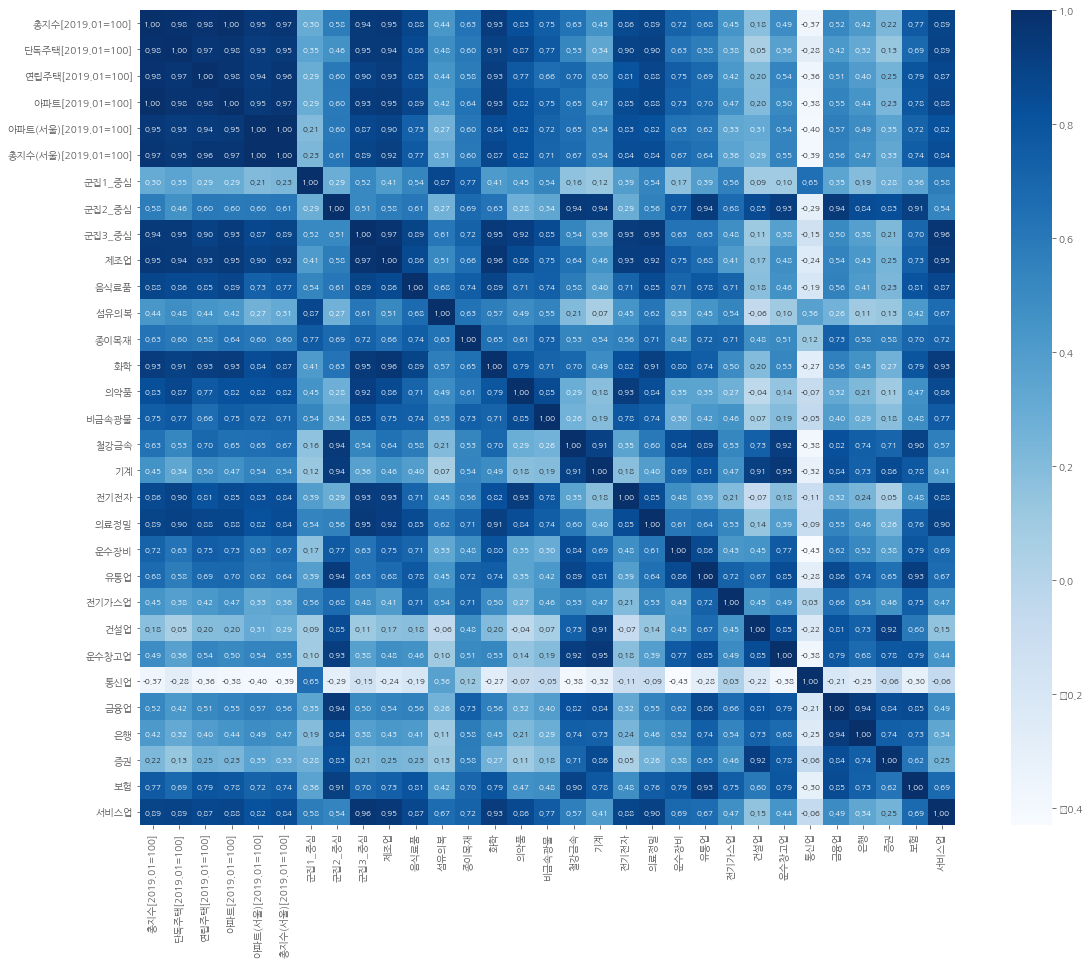

In [ ]:
# 전체 데이터 상관관계 분석 결과 heatmap
plt.figure(figsize=(20,15))
corr_heatmap = sns.heatmap(cluster_trading_cor_p, cbar = True, annot = True, annot_kws={'size' : 8},
                           fmt = '.2f', square = True, cmap = 'Blues')

### 중심값과 주택매매가격지수 상관분석

In [ ]:
# 중심값 결과 데이터와 주택매매가격지수 데이터 통합
center_cluster_trading = pd.concat([trading, center_result], axis=1)
center_cluster_trading.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심
날짜,,,,,,,,,
2000-01-01,48.819,72.153,56.103,39.474,31.660,39.451,3.001572,-0.849940,-0.972535
2000-02-01,49.027,72.236,56.231,39.783,32.136,39.782,2.486401,-1.167639,-0.942972
2000-03-01,49.234,72.319,56.615,40.015,32.433,40.114,2.476201,-1.234568,-0.970734
2000-04-01,49.286,72.236,56.679,40.092,32.433,40.238,1.260472,-1.408181,-1.103688
2000-05-01,49.234,72.153,56.615,40.015,32.403,40.238,1.153880,-1.463478,-1.171049


In [ ]:
# 중심값 결과 데이터와 주택매매가격지수 데이터 상관분석
center_cluster_trading_cor = center_cluster_trading.corr()
center_cluster_trading_cor = center_cluster_trading_cor.apply(lambda x: round(x, 2))
center_cluster_trading_cor

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심
총지수[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.30,0.58,0.94
단독주택[2019.01=100],0.98,1.00,0.97,0.98,0.93,0.95,0.35,0.46,0.95
연립주택[2019.01=100],0.98,0.97,1.00,0.98,0.94,0.96,0.29,0.60,0.90
아파트[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.29,0.60,0.93
아파트(서울)[2019.01=100],0.95,0.93,0.94,0.95,1.00,1.00,0.21,0.60,0.87
총지수(서울)[2019.01=100],0.97,0.95,0.96,0.97,1.00,1.00,0.23,0.61,0.89
군집1_중심,0.30,0.35,0.29,0.29,0.21,0.23,1.00,0.29,0.52
군집2_중심,0.58,0.46,0.60,0.60,0.60,0.61,0.29,1.00,0.51
군집3_중심,0.94,0.95,0.90,0.93,0.87,0.89,0.52,0.51,1.00


In [ ]:
# 중심값 결과 데이터와 주택매매 가격지수 데이터 피어슨 상관관계 분석
center_cluster_trading_cor_p = center_cluster_trading.corr(method = 'pearson')
center_cluster_trading_cor_p

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심
총지수[2019.01=100],1.000000,0.984761,0.982655,0.998703,0.951107,0.969822,0.304602,0.577523,0.939079
단독주택[2019.01=100],0.984761,1.000000,0.968155,0.976423,0.927888,0.948261,0.352741,0.462759,0.948262
연립주택[2019.01=100],0.982655,0.968155,1.000000,0.975979,0.935389,0.962528,0.290891,0.600833,0.903892
아파트[2019.01=100],0.998703,0.976423,0.975979,1.000000,0.949111,0.966607,0.294536,0.596396,0.934585
아파트(서울)[2019.01=100],0.951107,0.927888,0.935389,0.949111,1.000000,0.996093,0.207251,0.601709,0.872526
총지수(서울)[2019.01=100],0.969822,0.948261,0.962528,0.966607,0.996093,1.000000,0.226831,0.607573,0.889417
군집1_중심,0.304602,0.352741,0.290891,0.294536,0.207251,0.226831,1.000000,0.288638,0.518438
군집2_중심,0.577523,0.462759,0.600833,0.596396,0.601709,0.607573,0.288638,1.000000,0.514387
군집3_중심,0.939079,0.948262,0.903892,0.934585,0.872526,0.889417,0.518438,0.514387,1.000000


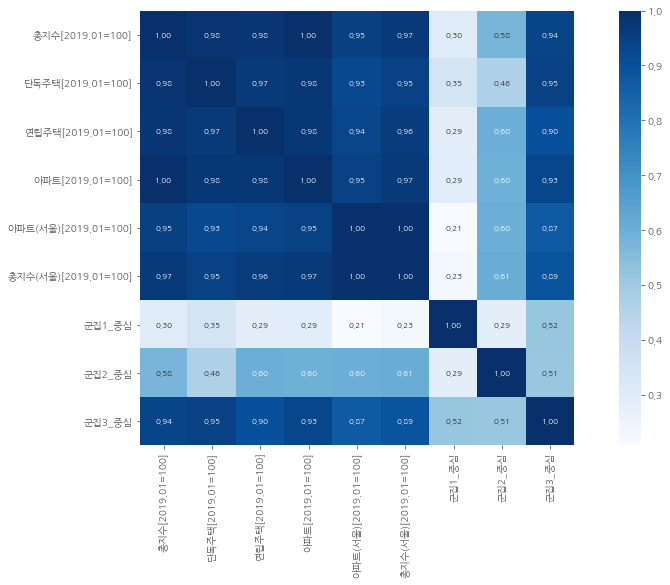

In [ ]:
# heatmap
plt.figure(figsize=(16,8))
center_corr_heatmap = sns.heatmap(center_cluster_trading_cor_p, cbar = True, annot = True, annot_kws={'size' : 8},
                           fmt = '.2f', square = True, cmap = 'Blues')

- 위의 두 상관분석 결과를 통해, 군집3에 속한 산업군의 KOSPI 지수 경향성이 주택매매가격지와 상관관계가 가장 높은 것을 확인할 수 있습니다.

### 상관분석 결과 전처리 및 저장

#### 전체 종목과 주택매매가격

In [ ]:
cluster_trading_cor.columns

Index(['총지수[2019.01=100]', '단독주택[2019.01=100]', '연립주택[2019.01=100]',
       '아파트[2019.01=100]', '아파트(서울)[2019.01=100]', '총지수(서울)[2019.01=100]',
       '군집1_중심', '군집2_중심', '군집3_중심', '제조업', '음식료품', '섬유의복', '종이목재', '화학',
       '의약품', '비금속광물', '철강금속', '기계', '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업',
       '건설업', '운수창고업', '통신업', '금융업', '은행', '증권', '보험', '서비스업'],
      dtype='object')

In [ ]:
# 변수명 저장
columns = [['총지수[2019.01=100]'], ['단독주택[2019.01=100]'], ['연립주택[2019.01=100]'],
       ['아파트[2019.01=100]'], ['아파트(서울)[2019.01=100]'], ['총지수(서울)[2019.01=100]'],
       ['군집1_중심'], ['군집2_중심'], ['군집3_중심'], ['제조업'], ['음식료품'], ['섬유의복'], ['종이목재'], ['화학'],
       ['의약품'], ['비금속광물'], ['철강금속'], ['기계'], ['전기전자'], ['의료정밀'], ['운수장비'], ['유통업'], ['전기가스업'],
       ['건설업'], ['운수창고업'], ['통신업'], ['금융업'], ['은행'], ['증권'], ['보험'], ['서비스업']]

In [ ]:
# 각 변수마다 31개(변수 수)씩 값을 생성
col_1 = []

for i in range(0, 31):
  col_1.append(columns[i]*31)

In [ ]:
col_1 = sum(col_1, [])
col_1[0:10]

['총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]']

In [ ]:
len(col_1)

961

In [ ]:
col_2 = sum(columns*31,[])
col_2[0:10]

['총지수[2019.01=100]',
 '단독주택[2019.01=100]',
 '연립주택[2019.01=100]',
 '아파트[2019.01=100]',
 '아파트(서울)[2019.01=100]',
 '총지수(서울)[2019.01=100]',
 '군집1_중심',
 '군집2_중심',
 '군집3_중심',
 '제조업']

In [ ]:
len(col_2)

961

In [ ]:
# 상관계수 값
value = sum(cluster_trading_cor.values.tolist(),[])
value[0:10]

[1.0, 0.98, 0.98, 1.0, 0.95, 0.97, 0.3, 0.58, 0.94, 0.95]

In [ ]:
len(value)

961

In [ ]:
# 데이터프레임 생성
cor_total_result = pd.DataFrame()
cor_total_result['구분1'] = col_1
cor_total_result['구분2'] = col_2
cor_total_result['값'] = value

In [ ]:
cor_total_result.head()

,구분1,구분2,값
0,총지수[2019.01=100],총지수[2019.01=100],1.00
1,총지수[2019.01=100],단독주택[2019.01=100],0.98
2,총지수[2019.01=100],연립주택[2019.01=100],0.98
3,총지수[2019.01=100],아파트[2019.01=100],1.00
4,총지수[2019.01=100],아파트(서울)[2019.01=100],0.95


In [ ]:
# 상관분석 결과 저장
cluster_trading_cor.to_csv("/content/drive/MyDrive/open (2)/cor_total_result.csv")

#### 전체 종목과 주택매매가격(피어슨)

In [ ]:
# 상관계수 값
value_p = sum(cluster_trading_cor_p.values.tolist(),[])
value_p[0:10]

[1.0,
 0.9847607598011333,
 0.9826553912636118,
 0.9987027074232405,
 0.951106703847821,
 0.9698217182113965,
 0.30460191039791684,
 0.5775228565048836,
 0.9390785542958817,
 0.9508338832770618]

In [ ]:
# 데이터 프레임 생성
cor_total_result_p = pd.DataFrame()
cor_total_result_p['구분1'] = col_1
cor_total_result_p['구분2'] = col_2
cor_total_result_p['값'] = value_p
cor_total_result_p.head()

,구분1,구분2,값
0,총지수[2019.01=100],총지수[2019.01=100],1.000000
1,총지수[2019.01=100],단독주택[2019.01=100],0.984761
2,총지수[2019.01=100],연립주택[2019.01=100],0.982655
3,총지수[2019.01=100],아파트[2019.01=100],0.998703
4,총지수[2019.01=100],아파트(서울)[2019.01=100],0.951107


In [ ]:
# 피어슨 상관분석 결과 저장
cluster_trading_cor_p.to_csv("/content/drive/MyDrive/open (2)/cor_total_result_p.csv")

#### 중심값과 주택매매가격

In [ ]:
center_cluster_trading_cor.columns

Index(['총지수[2019.01=100]', '단독주택[2019.01=100]', '연립주택[2019.01=100]',
       '아파트[2019.01=100]', '아파트(서울)[2019.01=100]', '총지수(서울)[2019.01=100]',
       '군집1_중심', '군집2_중심', '군집3_중심'],
      dtype='object')

In [ ]:
# 변수명 저장
columns2 = [['총지수[2019.01=100]'], ['단독주택[2019.01=100]'], ['연립주택[2019.01=100]'],
       ['아파트[2019.01=100]'], ['아파트(서울)[2019.01=100]'], ['총지수(서울)[2019.01=100]'],
       ['군집1_중심'], ['군집2_중심'], ['군집3_중심']]

In [ ]:
# 각 변수마다 9개(변수 수)씩 값을 생성
col2_1 = []

for i in range(0, 9):
  col2_1.append(columns2[i]*9)

In [ ]:
col2_1 = sum(col2_1, [])
col2_1[0:10]

['총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '총지수[2019.01=100]',
 '단독주택[2019.01=100]']

In [ ]:
len(col2_1)

81

In [ ]:
col2_2 = sum(columns2*9,[])
col2_2[0:10]

['총지수[2019.01=100]',
 '단독주택[2019.01=100]',
 '연립주택[2019.01=100]',
 '아파트[2019.01=100]',
 '아파트(서울)[2019.01=100]',
 '총지수(서울)[2019.01=100]',
 '군집1_중심',
 '군집2_중심',
 '군집3_중심',
 '총지수[2019.01=100]']

In [ ]:
len(col2_2)

81

In [ ]:
# 상관계수 값
value2 = sum(center_cluster_trading_cor.values.tolist(),[])
value2[0:10]

[1.0, 0.98, 0.98, 1.0, 0.95, 0.97, 0.3, 0.58, 0.94, 0.98]

In [ ]:
len(value2)

81

In [ ]:
# 데이터 프레임 생성
cor_result = pd.DataFrame()
cor_result['구분1'] = col2_1
cor_result['구분2'] = col2_2
cor_result['값'] = value2
cor_result

,구분1,구분2,값
0,총지수[2019.01=100],총지수[2019.01=100],1.00
1,총지수[2019.01=100],단독주택[2019.01=100],0.98
2,총지수[2019.01=100],연립주택[2019.01=100],0.98
3,총지수[2019.01=100],아파트[2019.01=100],1.00
4,총지수[2019.01=100],아파트(서울)[2019.01=100],0.95
...,...,...,...
76,군집3_중심,아파트(서울)[2019.01=100],0.87
77,군집3_중심,총지수(서울)[2019.01=100],0.89
78,군집3_중심,군집1_중심,0.52
79,군집3_중심,군집2_중심,0.51


In [ ]:
center_cluster_trading_cor

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심
총지수[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.30,0.58,0.94
단독주택[2019.01=100],0.98,1.00,0.97,0.98,0.93,0.95,0.35,0.46,0.95
연립주택[2019.01=100],0.98,0.97,1.00,0.98,0.94,0.96,0.29,0.60,0.90
아파트[2019.01=100],1.00,0.98,0.98,1.00,0.95,0.97,0.29,0.60,0.93
아파트(서울)[2019.01=100],0.95,0.93,0.94,0.95,1.00,1.00,0.21,0.60,0.87
총지수(서울)[2019.01=100],0.97,0.95,0.96,0.97,1.00,1.00,0.23,0.61,0.89
군집1_중심,0.30,0.35,0.29,0.29,0.21,0.23,1.00,0.29,0.52
군집2_중심,0.58,0.46,0.60,0.60,0.60,0.61,0.29,1.00,0.51
군집3_중심,0.94,0.95,0.90,0.93,0.87,0.89,0.52,0.51,1.00


In [ ]:
# 상관분석 결과 저장
cor_result.to_csv("/content/drive/MyDrive/open (2)/cor_result.csv")

#### 중심값과 주택매매가격(피어슨)

In [ ]:
# 상관계수 값
value2_p = sum(center_cluster_trading_cor_p.values.tolist(),[])
value2_p[0:10]

[1.0,
 0.9847607598011333,
 0.9826553912636118,
 0.9987027074232405,
 0.951106703847821,
 0.9698217182113965,
 0.30460191039791684,
 0.5775228565048836,
 0.9390785542958817,
 0.9847607598011333]

In [ ]:
# 데이터 프레임 생성
cor_result_p = pd.DataFrame()
cor_result_p['구분1'] = col2_1
cor_result_p['구분2'] = col2_2
cor_result_p['값'] = value2_p
cor_result_p

,구분1,구분2,값
0,총지수[2019.01=100],총지수[2019.01=100],1.000000
1,총지수[2019.01=100],단독주택[2019.01=100],0.984761
2,총지수[2019.01=100],연립주택[2019.01=100],0.982655
3,총지수[2019.01=100],아파트[2019.01=100],0.998703
4,총지수[2019.01=100],아파트(서울)[2019.01=100],0.951107
...,...,...,...
76,군집3_중심,아파트(서울)[2019.01=100],0.872526
77,군집3_중심,총지수(서울)[2019.01=100],0.889417
78,군집3_중심,군집1_중심,0.518438
79,군집3_중심,군집2_중심,0.514387


In [ ]:
center_cluster_trading_cor_p

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],군집1_중심,군집2_중심,군집3_중심
총지수[2019.01=100],1.000000,0.984761,0.982655,0.998703,0.951107,0.969822,0.304602,0.577523,0.939079
단독주택[2019.01=100],0.984761,1.000000,0.968155,0.976423,0.927888,0.948261,0.352741,0.462759,0.948262
연립주택[2019.01=100],0.982655,0.968155,1.000000,0.975979,0.935389,0.962528,0.290891,0.600833,0.903892
아파트[2019.01=100],0.998703,0.976423,0.975979,1.000000,0.949111,0.966607,0.294536,0.596396,0.934585
아파트(서울)[2019.01=100],0.951107,0.927888,0.935389,0.949111,1.000000,0.996093,0.207251,0.601709,0.872526
총지수(서울)[2019.01=100],0.969822,0.948261,0.962528,0.966607,0.996093,1.000000,0.226831,0.607573,0.889417
군집1_중심,0.304602,0.352741,0.290891,0.294536,0.207251,0.226831,1.000000,0.288638,0.518438
군집2_중심,0.577523,0.462759,0.600833,0.596396,0.601709,0.607573,0.288638,1.000000,0.514387
군집3_중심,0.939079,0.948262,0.903892,0.934585,0.872526,0.889417,0.518438,0.514387,1.000000


In [ ]:
# 상관분석 결과 저장
cor_result_p.to_csv("/content/drive/MyDrive/open (2)/cor_result_p.csv")